<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/11_SVM_with_pca_bc_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

### Import Wisconsin Breast Cancer Dataset from sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [ ]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
type(cancer_data)

sklearn.utils._bunch.Bunch

In [ ]:
cancer_data.feature_names # list the feature names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer_data.target_names # list target names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Let X contain the features of the cancer_data dataset in ndarray
# Let Y contain the corresponding labels (target)
X = cancer_data.data
Y = cancer_data.target

In [ ]:
# Summarize Key information about dataset
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', cancer_data.target_names)
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f'{n_pos} positive samples and {n_neg} negative samples.')

Input data size : (569, 30)
Output data size : (569,)
Label names: ['malignant' 'benign']
357 positive samples and 212 negative samples.


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [ ]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Fit the svm model: we skipped standadization of data as SVM is less sensitive to scaling.
from sklearn.svm import SVC # SVC classifier
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train_scaled, Y_train)
accuracy = clf.score(X_test_scaled, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 97.2%


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(Y_test, clf.predict(X_test_scaled))
print(pd.DataFrame(cm, columns=cancer_data.target_names, index=cancer_data.target_names))

           malignant  benign
malignant         52       2
benign             2      87


In [ ]:
# in confusion matrix above, which are "predicted" values, rows or columns?
confusion_matrix?
'''
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}` is equal to
the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.
'''

'\nBy definition a confusion matrix :math:`C` is such that :math:`C_{i, j}` is equal to\nthe number of observations known to be in group :math:`i` and\npredicted to be in group :math:`j`.\n'

- Feature importance analysis
Use techniques like `permutation_importance` to identify the most influential features in the SVM models.

'permutation_importanc()` selects one feature at a time and randomly shuffles its values (permutation). The model's prediction performance is re-evaluated using the dataset with permuted feature values.

This can help in understanding which features contribute the most to the model's predictions and guide feature selection or engineering efforts.

In [ ]:
from sklearn.inspection import permutation_importance

# permutation feature importance
result = permutation_importance(clf, X_test_scaled, Y_test, n_repeats=20, random_state=42)
# feature importance scores
importances = result.importances_mean

Text(0.5, 1.0, 'Permutation Feature Importance')

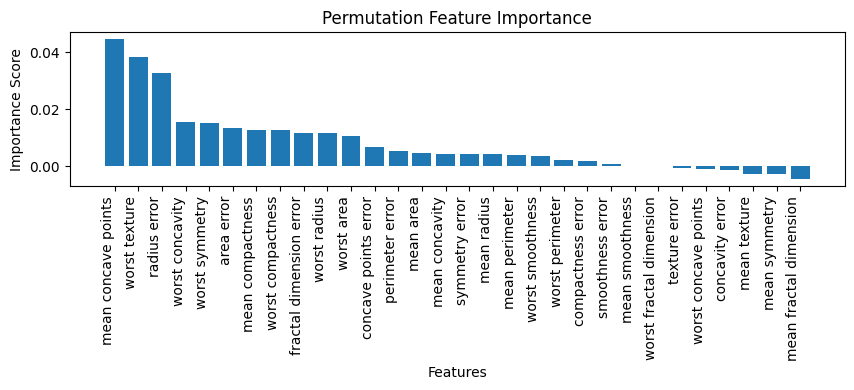

In [ ]:
import matplotlib.pyplot as plt
# dataframe with feature names and their corresponding importance scores
df_importances = pd.DataFrame({'Feature': cancer_data.feature_names, 'Importance': importances})

# Sort the dataframe by importance scores in descending order
df_importances = df_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,2))
plt.bar(df_importances['Feature'], df_importances['Importance'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Permutation Feature Importance')

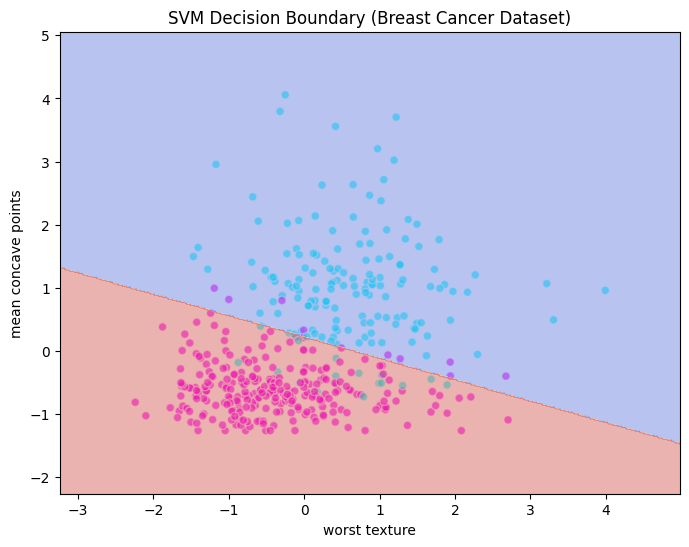

In [ ]:
# Get the indices of the top 2 features
top_features = importances.argsort()[-2:]

# Train a new SVM model using only the top 2 features
X_train_selected = X_train_scaled[:, top_features]
X_test_selected = X_test_scaled[:, top_features]
clf_selected = SVC(kernel='linear', C=1.0, random_state=42)
clf_selected.fit(X_train_selected, Y_train)

# Create a meshgrid of points for the selected features
x_min, x_max = X_train_selected[:, 0].min() - 1, X_train_selected[:, 0].max() + 1
y_min, y_max = X_train_selected[:, 1].min() - 1, X_train_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Create a meshgrid with the selected features
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the meshgrid using the new SVM model
Z = clf_selected.predict(X_grid)
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
#plt.scatter(X_test_selected[:, 0], X_test_selected[:, 1], c=Y_test, cmap=plt.cm.cool)
plt.scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=Y_train, cmap=plt.cm.cool, alpha=0.6, edgecolor='w')

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.xlabel(cancer_data.feature_names[top_features[0]])
plt.ylabel(cancer_data.feature_names[top_features[1]])
plt.title('SVM Decision Boundary (Breast Cancer Dataset)')
plt.show()

In [ ]:
# Predictions using the trained SVM model
Y_pred_selected = clf_selected.predict(X_test_pca_selected)

# Accuracy
accuracy_selected = accuracy_score(Y_test, Y_pred_selected)
print("Accuracy (PCA):", accuracy_selected)

# Confusion matrix: slightly higher accuracy score
cm_selected = confusion_matrix(Y_test, Y_pred_selected)
print("\nConfusion Matrix (PCA):\n")
print(pd.DataFrame(cm_selected, index=cancer_data.target_names, columns=cancer_data.target_names))

#How's the results?

Accuracy (PCA): 0.6083916083916084

Confusion Matrix (PCA):

           malignant  benign
malignant         31      23
benign            33      56


---

In [ ]:
# Perform Principal Component Analysis
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# Top 5 principle components

explained_variances = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variances[:5]):
  print(f"Principal Component {i+1}: {variance*100:.2f}%")

# Sum of variance Top2
print(f"\nTop 2 sum of variance: {explained_variances[:2].sum().round(2)*100}%")

Principal Component 1: 43.74%
Principal Component 2: 19.53%
Principal Component 3: 9.62%
Principal Component 4: 6.48%
Principal Component 5: 5.18%

Top 2 sum of variance: 63.0%


In [ ]:
# Train an SVM model using the top 2 principal components
X_train_pca_selected = X_train_pca[:, :2]
X_test_pca_selected = X_test_pca[:, :2]
clf_pca = SVC(kernel='linear', C=1.0, random_state=42)
clf_pca.fit(X_train_pca_selected, Y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions using the trained SVM model
Y_pred_pca = clf_pca.predict(X_test_pca_selected)

# Accuracy
accuracy_pca = accuracy_score(Y_test, Y_pred_pca)
print("Accuracy (PCA):", accuracy_pca)

# Confusion matrix: slightly higher accuracy score
cm_pca = confusion_matrix(Y_test, Y_pred_pca)
print("\nConfusion Matrix (PCA):\n")
print(pd.DataFrame(cm_pca, index=cancer_data.target_names, columns=cancer_data.target_names))


Accuracy (PCA): 0.9790209790209791

Confusion Matrix (PCA):

           malignant  benign
malignant         53       1
benign             2      87


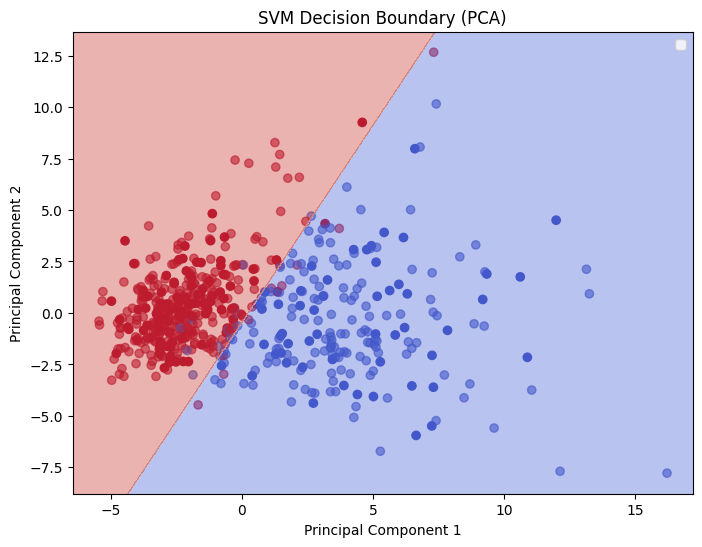

In [ ]:

# Create a meshgrid of points for the PCA-selected features
x_min, x_max = X_train_pca_selected[:, 0].min() - 1, X_train_pca_selected[:, 0].max() + 1
y_min, y_max = X_train_pca_selected[:, 1].min() - 1, X_train_pca_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Create a meshgrid with the PCA-selected features
X_grid_pca = np.c_[xx.ravel(), yy.ravel()]

# Predicted the class for each point in the meshgrid using the PCA-based SVM model
Z_pca = clf_pca.predict(X_grid_pca)
Z_pca = Z_pca.reshape(xx.shape)

# Scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca_selected[:, 0], X_test_pca_selected[:, 1], c=Y_test, cmap=plt.cm.coolwarm) # see test data
plt.scatter(X_train_pca_selected[:, 0], X_train_pca_selected[:, 1], c=Y_train, cmap=plt.cm.coolwarm, alpha=0.6) # see train data

# Decision boundary
plt.contourf(xx, yy, Z_pca, alpha=0.4, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary (PCA)')
plt.legend()
plt.show()